In [ ]:
#import needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor # ???
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler #standard scaler
from sklearn.metrics import accuracy_score

from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier

from pandas.core.algorithms import diff
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, f1_score
from sklearn.model_selection import RandomizedSearchCV

import seaborn as sns
from sklearn.pipeline import Pipeline, make_pipeline

from numpy import asarray
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#load full data source
df_full = pd.read_csv('/content/drive/MyDrive/nfl_full.csv',low_memory=False)

In [ ]:
df_full.shape

(449371, 255)

In [ ]:
df_full.describe()

,play_id,game_id,yardline_100,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,quarter_end,drive,sp,qtr,...,assist_tackle_4_team,fumble_recovery_1_yards,fumble_recovery_2_yards,return_yards,penalty_yards,replay_or_challenge,defensive_two_point_attempt,defensive_two_point_conv,defensive_extra_point_attempt,defensive_extra_point_conv
count,449371.000000,4.493710e+05,436301.000000,449230.000000,449206.000000,449208.000000,449371.000000,449371.000000,449371.000000,449371.000000,...,0.0,6026.000000,47.000000,449350.000000,32618.000000,449371.000000,436497.000000,436497.000000,436497.0,436497.0
mean,2140.689606,2.013620e+09,49.800658,413.968820,810.775709,1700.697033,0.017111,12.275053,0.072090,2.577696,...,NaN,2.302688,4.808511,1.042773,8.487829,0.001823,0.000069,0.000014,0.0,0.0
std,1240.303671,2.842246e+06,25.062131,279.137304,554.712205,1053.533368,0.129684,7.124626,0.258637,1.129958,...,NaN,9.066064,14.961746,5.462253,5.323953,0.042652,0.008290,0.003708,0.0,0.0
min,35.000000,2.009091e+09,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,NaN,-34.000000,-16.000000,-18.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,1074.000000,2.011111e+09,31.000000,152.000000,286.000000,784.000000,0.000000,6.000000,0.000000,2.000000,...,NaN,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.0,0.0
50%,2125.000000,2.013123e+09,52.000000,396.000000,797.000000,1800.000000,0.000000,12.000000,0.000000,3.000000,...,NaN,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.0,0.0
75%,3180.000000,2.016103e+09,71.000000,656.000000,1288.000000,2583.000000,0.000000,18.000000,0.000000,4.000000,...,NaN,0.000000,4.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.0,0.0
max,5706.000000,2.018122e+09,99.000000,900.000000,1800.000000,3600.000000,1.000000,38.000000,1.000000,5.000000,...,NaN,93.000000,77.000000,109.000000,66.000000,1.000000,1.000000,1.000000,0.0,0.0


In [ ]:
# get summary statistics
df_full.dtypes

play_id                            int64
game_id                            int64
home_team                         object
away_team                         object
posteam                           object
                                  ...   
penalty_type                      object
defensive_two_point_attempt      float64
defensive_two_point_conv         float64
defensive_extra_point_attempt    float64
defensive_extra_point_conv       float64
Length: 255, dtype: object

In [ ]:
#load currated data source
df = pd.read_csv('/content/drive/MyDrive/NFL_data.csv',low_memory=False)

In [ ]:
# check shape
df.shape

(449371, 95)

In [ ]:
#using smaller dataset to test
#df=df[:250000]

In [ ]:
df.shape

(449371, 95)

In [ ]:
# explore datatypes
df.dtypes

play_id                            int64
game_id                            int64
home_team                         object
away_team                         object
yardline_100                     float64
                                  ...   
penalty_type                      object
defensive_two_point_attempt      float64
defensive_two_point_conv         float64
defensive_extra_point_attempt    float64
defensive_extra_point_conv       float64
Length: 95, dtype: object

In [ ]:
#look at data sample
df.head()

,play_id,game_id,home_team,away_team,yardline_100,game_seconds_remaining,drive,qtr,down,goal_to_go,...,lateral_return,lateral_recovery,return_yards,penalty_yards,replay_or_challenge,penalty_type,defensive_two_point_attempt,defensive_two_point_conv,defensive_extra_point_attempt,defensive_extra_point_conv
0,46,2009091000,PIT,TEN,30.0,3600.0,1,1,NaN,0.0,...,0.0,0.0,39.0,NaN,0,NaN,0.0,0.0,0.0,0.0
1,68,2009091000,PIT,TEN,58.0,3593.0,1,1,1.0,0.0,...,0.0,0.0,0.0,NaN,0,NaN,0.0,0.0,0.0,0.0
2,92,2009091000,PIT,TEN,53.0,3556.0,1,1,2.0,0.0,...,0.0,0.0,0.0,NaN,0,NaN,0.0,0.0,0.0,0.0
3,113,2009091000,PIT,TEN,56.0,3515.0,1,1,3.0,0.0,...,0.0,0.0,0.0,NaN,0,NaN,0.0,0.0,0.0,0.0
4,139,2009091000,PIT,TEN,56.0,3507.0,1,1,4.0,0.0,...,0.0,0.0,0.0,NaN,0,NaN,0.0,0.0,0.0,0.0


In [ ]:
# check for NaNs
df.isnull().sum()

play_id                               0
game_id                               0
home_team                             0
away_team                             0
yardline_100                      13070
                                  ...  
penalty_type                     418232
defensive_two_point_attempt       12874
defensive_two_point_conv          12874
defensive_extra_point_attempt     12874
defensive_extra_point_conv        12874
Length: 95, dtype: int64

In [ ]:
# convert NaNs to zeros and check replacement
df=df.fillna(0)
df.isnull().sum()

play_id                          0
game_id                          0
home_team                        0
away_team                        0
yardline_100                     0
                                ..
penalty_type                     0
defensive_two_point_attempt      0
defensive_two_point_conv         0
defensive_extra_point_attempt    0
defensive_extra_point_conv       0
Length: 95, dtype: int64

In [ ]:
# drop columns specific team information and unnecessary info
df.drop(['play_id','home_team','away_team'],axis=1,inplace=True)

In [ ]:
# determine number of games in the sample
games=df.game_id.unique()
len(games)

2526

In [ ]:
# pull first game number
games[0]

2009091000

In [ ]:
#explore data of a single game
df1=df[df.game_id==2009091000]
df1.head()

,game_id,yardline_100,game_seconds_remaining,drive,qtr,down,goal_to_go,ydstogo,ydsnet,play_type,...,lateral_return,lateral_recovery,return_yards,penalty_yards,replay_or_challenge,penalty_type,defensive_two_point_attempt,defensive_two_point_conv,defensive_extra_point_attempt,defensive_extra_point_conv
0,2009091000,30.0,3600.0,1,1,0.0,0.0,0,0,kickoff,...,0.0,0.0,39.0,0.0,0,0,0.0,0.0,0.0,0.0
1,2009091000,58.0,3593.0,1,1,1.0,0.0,10,5,pass,...,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0
2,2009091000,53.0,3556.0,1,1,2.0,0.0,5,2,run,...,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0
3,2009091000,56.0,3515.0,1,1,3.0,0.0,8,2,pass,...,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0
4,2009091000,56.0,3507.0,1,1,4.0,0.0,8,2,punt,...,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0


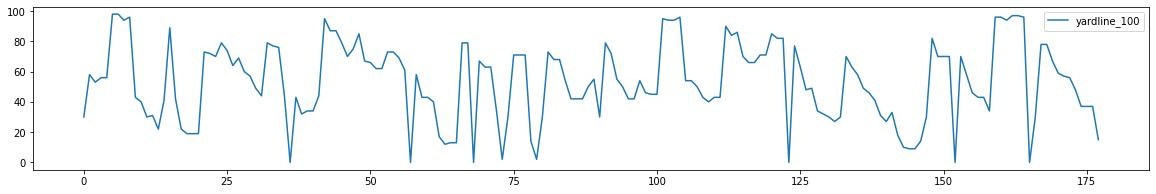

In [ ]:
#let's look at a single game
plt.rcParams["figure.figsize"] = (20,3)
df_plot=df1[['yardline_100']]
df_plot.plot()
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

In [ ]:
# determine outcome of each game to create a y (outcome) variable
game_results=df.groupby('game_id')[['total_home_score','total_away_score']].max()
def f(row):
  if row.total_home_score > row.total_away_score:
    return 1
  else:
      return 0

game_results['home_team_wins']=game_results.apply(f,axis=1)

In [ ]:
game_results.head()

,total_home_score,total_away_score,home_team_wins
game_id,,,
2009091000,13,10,1
2009091300,19,7,1
2009091301,38,23,1
2009091302,10,36,0
2009091303,7,12,0


In [ ]:
# get list of columns with dtype of object
col_obj=df.select_dtypes(include=['object']).columns.tolist()
col_obj

['play_type',
 'pass_length',
 'pass_location',
 'run_location',
 'run_gap',
 'field_goal_result',
 'extra_point_result',
 'penalty_type']

In [ ]:
#get dummies for categorical data
df=pd.get_dummies(df,drop_first=True)

In [ ]:
#check to see if all columns are numeric
df.dtypes

game_id                                   int64
yardline_100                            float64
game_seconds_remaining                  float64
drive                                     int64
qtr                                       int64
                                         ...   
penalty_type_Short Free Kick              uint8
penalty_type_Taunting                     uint8
penalty_type_Tripping                     uint8
penalty_type_Unnecessary Roughness        uint8
penalty_type_Unsportsmanlike Conduct      uint8
Length: 175, dtype: object

In [ ]:
#function to spread out vertical data to horizontal position
#puts all data from a single game into a single row
def compress_game(data, plays):
  data.drop('game_id',axis=1,inplace=True)
  n_vars = data.shape[1]
  col_names=data.columns.to_list()
  cols, names = list(), list()
  for i in range(plays):
    cols.append(data.shift(-i))
    if i == 0:
      names += [('%s(t)' % (col_names[j])) for j in range(n_vars)]
    else:
      names += [('%s(t+%d)' % (col_names[j], i)) for j in range(n_vars)]
  agg=pd.concat(cols, axis=1)
  agg.columns = names
  return pd.DataFrame(agg.iloc[0,:]).transpose()

In [ ]:
#convert all games into single row format 
def process_all_games(df,plays):
  games=df.game_id.unique()
  df_set=pd.DataFrame()
  for game in games:
    df_game=df[df.game_id==game].iloc[0:plays,:]
    df_row=compress_game(df_game,plays=plays)
    df_set=pd.concat([df_set,df_row], axis=0)
  return df_set

In [ ]:
# call function to process all games
# 1st argumenet is df, 2nd is number of plays used
no_of_plays=100
ddf = process_all_games(df,no_of_plays)

In [ ]:
ddf.shape

(2526, 17400)

In [ ]:
# reset index and display compressed datafile
ddf=ddf.reset_index()
del ddf['index']
ddf.head()

,yardline_100(t),game_seconds_remaining(t),drive(t),qtr(t),down(t),goal_to_go(t),ydstogo(t),ydsnet(t),yards_gained(t),shotgun(t),...,penalty_type_Player Out of Bounds on Kick(t+99),penalty_type_Player Out of Bounds on Punt(t+99),penalty_type_Roughing the Kicker(t+99),penalty_type_Roughing the Passer(t+99),penalty_type_Running Into the Kicker(t+99),penalty_type_Short Free Kick(t+99),penalty_type_Taunting(t+99),penalty_type_Tripping(t+99),penalty_type_Unnecessary Roughness(t+99),penalty_type_Unsportsmanlike Conduct(t+99)
0,30.0,3600.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,30.0,3600.0,1.0,1.0,0.0,0.0,0.0,31.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,30.0,3600.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,30.0,3600.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,30.0,3600.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# define dataset 

X = ddf.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
y = game_results.home_team_wins

In [ ]:
# function used to test different models
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

In [ ]:
# list of models to evaluate
def get_models():
	models = dict()
	models['lr'] = LogisticRegression()
	models['knn'] = KNeighborsClassifier()
	models['cart'] = DecisionTreeClassifier()
	models['svm'] = SVC()
	models['bayes'] = GaussianNB()
	return models


In [ ]:
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>lr 0.575 (0.029)
>knn 0.509 (0.025)
>cart 0.534 (0.023)
>svm 0.570 (0.001)
>bayes 0.510 (0.027)


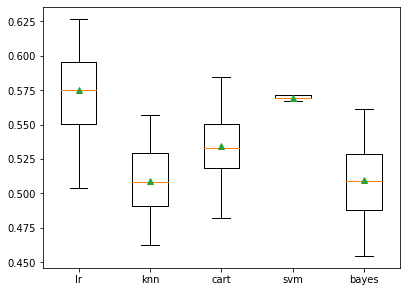

In [ ]:
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [ ]:
# create train and test versions
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [ ]:
pipe_lr = make_pipeline(StandardScaler(), LogisticRegression())
pipe_lr.fit(X_train, y_train)  # apply scaling on training data
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

predictions = pipe_lr.predict(X_test)
print(accuracy_score(y_test, predictions))

0.5652173913043478


In [ ]:
train_probs = pipe_lr.predict_proba(X_train)[:,1] 
probs = pipe_lr.predict_proba(X_test)[:, 1]
train_predictions = pipe_lr.predict(X_train)
y_pred = pipe_lr.predict(X_test)

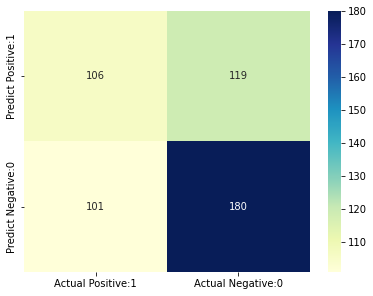

In [ ]:
# visualize confusion matrix with seaborn heatmap
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
pipe_svc = make_pipeline(StandardScaler(), SVC(probability=True))
pipe_svc.fit(X_train, y_train)  # apply scaling on training data
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('supportvectorclassification',SVC())])

predictions = pipe_svc.predict(X_test)
print(accuracy_score(y_test, predictions))

0.5770750988142292


In [ ]:
train_probs = pipe_svc.predict_proba(X_train)[:,1] 
probs = pipe_svc.predict_proba(X_test)[:, 1]
train_predictions = pipe_svc.predict(X_train)
y_pred = pipe_svc.predict(X_test)

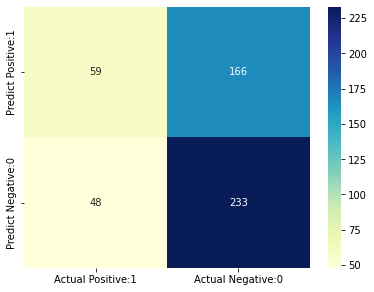

In [ ]:
# visualize confusion matrix with seaborn heatmap
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')


In [ ]:
# intialized Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(
                      min_samples_leaf=50,
                      n_estimators=150,
                      bootstrap=True,
                      oob_score=True,
                      n_jobs=-1,
                      random_state=50,
                      max_features='auto')
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.510 (0.027)


In [ ]:
#fit Random Forest Classifier
rfc.fit(X_train,y_train)

RandomForestClassifier(min_samples_leaf=50, n_estimators=150, n_jobs=-1,
                       oob_score=True, random_state=50)

In [ ]:
train_probs = rfc.predict_proba(X_train)[:,1] 
probs = rfc.predict_proba(X_test)[:, 1]
train_predictions = rfc.predict(X_train)
y_pred = rfc.predict(X_test)

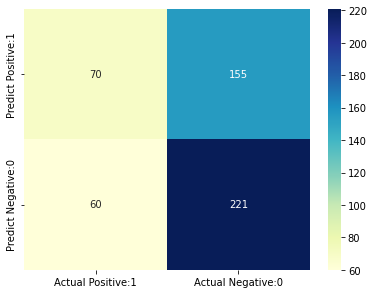

In [ ]:
# visualize confusion matrix with seaborn heatmap
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')



In [ ]:
print(rfc.feature_importances_)
print(f" There are {len(rfc.feature_importances_)} features in total")

[0. 0. 0. ... 0. 0. 0.]
 There are 17400 features in total


In [ ]:
feature_importances = list(zip(X_train, rfc.feature_importances_))
# sort the feature importances by most important first
feature_importances_ranked = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# print out the feature and importances
[print('Feature: {:35} Importance: {}'.format(*pair)) for pair in feature_importances_ranked[:25]];

Feature: total_away_score(t+94)              Importance: 0.008899538550466449
Feature: total_home_score(t+98)              Importance: 0.008872178189298209
Feature: total_away_score(t+83)              Importance: 0.008572524394847528
Feature: total_home_score(t+57)              Importance: 0.008268602749548742
Feature: total_home_score(t+94)              Importance: 0.0081428314316074
Feature: total_home_score(t+90)              Importance: 0.00785776084226108
Feature: total_home_score(t+83)              Importance: 0.007846848577401241
Feature: total_away_score(t+77)              Importance: 0.007807289068756573
Feature: total_home_score(t+77)              Importance: 0.0076518491853105886
Feature: total_home_score(t+89)              Importance: 0.00727272698307631
Feature: total_away_score(t+92)              Importance: 0.007139399275162406
Feature: total_away_score(t+97)              Importance: 0.0070505388146626805
Feature: total_home_score(t+80)              Importance: 0.0067148

findfont: Font family ['Comic Sans MS'] not found. Falling back to DejaVu Sans.


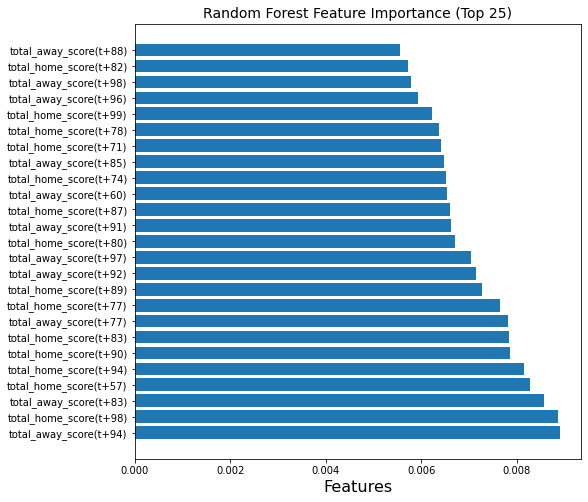

In [ ]:
feature_names_25 = [i[0] for i in feature_importances_ranked[:25]]
y_ticks = np.arange(0, len(feature_names_25))
x_axis = [i[1] for i in feature_importances_ranked[:25]]
plt.figure(figsize = (8, 8))
plt.barh(feature_names_25, x_axis)   #horizontal barplot
plt.title('Random Forest Feature Importance (Top 25)',
          fontdict= {'fontname':'Comic Sans MS','fontsize' : 14})
plt.xlabel('Features',fontdict= {'fontsize' : 16})
plt.show()

In [ ]:
# function to setup classifier
def classifier(df):
  X = ddf.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
  y = game_results.home_team_wins
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
  # report performance
  return mean(n_scores)

In [ ]:
# function to iterate over # of plays used to predict
plays_list=[]
acur_scores=[]
for plays in range(10,130,10):
  ddf = process_all_games(df,plays)
  plays_list.append(plays)
  scr=classifier(ddf)
  acur_scores.append(scr)

print(acur_scores)


In [ ]:
acur_df=pd.DataFrame(acur_scores)
acur_df['plays']=plays_list
acur_df.columns=['mean_score','no_of_plays']
acur_df.plot(x='no_of_plays', y='mean_score')